# Problem 10.4

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 10**

**Problem 10.4**

**In this problem, we will refine the analysis of the optimal tilt and inter-row spacing by using radiation data for the Typical Meteorological Year (TMY) and pvlib to model the irradiance on the PV modules for different tilt angles.**

**(a) For the location defined in Problem 10.1 (latitude and longitude 40.371944⁰N, -3.7825⁰W), calculate and plot the annual radiation on the PV module as a function of the tilt angle.**


We will use the packages [pvlib](https://pvlib-python.readthedocs.io/en/stable/), [pandas](https://pandas.pydata.org/) and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results. We will also use the package [pytz](https://pypi.org/project/pytz/) to determine the time zone of the location (Madrid).

In [9]:
import pvlib
import pandas as pd
import matplotlib.pyplot as plt
import pytz
import numpy as np

We start by defining the location, date, and time. 

In [10]:
# Cuatro Vientos, Madrid, Spain
lat, lon = 40.371944, -3.7825
#altitude = 22

tz = pytz.timezone('Europe/Madrid')

# location
location = pvlib.location.Location(lat, lon, tz=tz)

orientation = 180 # pvlib sets orientation origin at North -> South=180

We retrieve typical meteorological year (TMY) data from PVGIS.

In [11]:
tmy, _, _, _ = pvlib.iotools.get_pvgis_tmy(latitude=lat, longitude=lon, map_variables=True)

tmy.index = tmy.index.tz_convert(tz) # use local time

We calculate the Sun's coordinates 

In [12]:
# calculate Sun's coordinates
solar_position = location.get_solarposition(times=tmy.index)

We calculate the annual radiation (or reference yield) on the PV modules for different tilt angles.

In [13]:
#list of potential tilt angle
tilts=range(0,90,1)

Y_R = pd.Series(index=tilts, dtype=float)
for tilt in tilts: 
    # calculate irradiante at the plane of the array (poa)
    poa_irradiance = pvlib.irradiance.get_total_irradiance(surface_tilt=tilt,
                                                           surface_azimuth=orientation,
                                                           dni=tmy['dni'],
                                                           ghi=tmy['ghi'],
                                                           dhi=tmy['dhi'],
                                                           solar_zenith=solar_position['apparent_zenith'],
                                                           solar_azimuth=solar_position['azimuth'])    
    #save reference yield
    Y_R[tilt]=0.001*poa_irradiance['poa_global'].sum()


We can plot the reference yield as a function of the tilt angle.

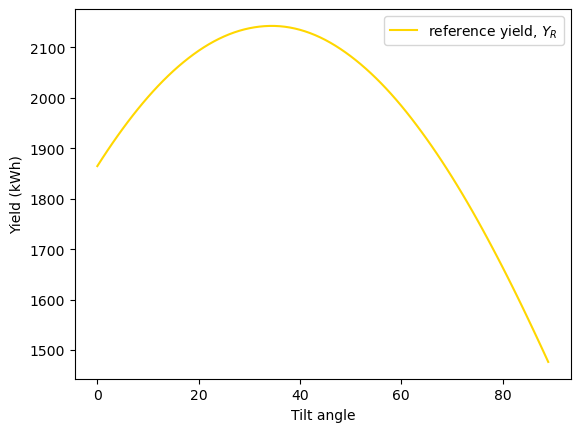

In [14]:
Y_R.plot(label="reference yield, $Y_R$", color='gold')
plt.ylabel('Yield (kWh)')
plt.xlabel('Tilt angle')
plt.legend()

We can see that the maximum annual irradiation on the PV panels surface, or reference yield, maximizes at around 35$^{\circ}$ but the maximum is quite flat.

**(b) Calculate and plot the required inter-row spacing to avoid self-shadowing at noon on winter solstice, as a function of the tilt angle.**

**(c) Calculate the ground cover ratio (CGR) as a function of the tilt angle.**

In [15]:
#sun elevation at solar noon in winter solstice
gamma_s = (180/np.pi)*np.arcsin(np.sin(-23.45*np.pi/180)*np.sin(lat*np.pi/180)+np.cos(-23.45*np.pi/180)*np.cos(lat*np.pi/180)*np.cos(0*np.pi/180))
L=2

#list of potential tilt angle
tilts=range(0,90,1)

d_pitch = pd.Series(index=tilts, dtype=float)
GCR = pd.Series(index=tilts, dtype=float)

for tilt in tilts: 
    d = L*np.cos(tilt*np.pi/180)+L*np.sin(tilt*np.pi/180)/np.tan(gamma_s*np.pi/180)
    d_pitch[tilt] = d
    GCR[tilt] = L/d

Text(0, 0.5, 'GCR')

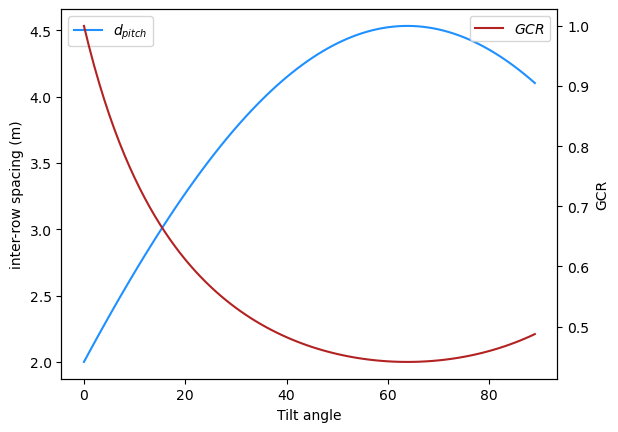

In [16]:
d_pitch.plot(label="$d_{pitch}$", color='dodgerblue')
plt.ylabel('inter-row spacing (m)')
plt.xlabel('Tilt angle')
plt.legend()
plt.twinx()
GCR.plot(label="$GCR$", color='firebrick')
plt.legend()
plt.ylabel('GCR')

Finally, we can plot together the annual irradiance received on the PV modules, or reference yield, and the GCR. Then, we can see that although the reference yield maximizes at 35$^{\circ}$, selecting 30$^{\circ}$ or even 25$^{\circ}$ as the tilt angle can be advantageous since the reference yield is similar to the maximum and the ground cover ratio increases significantly.

To select the best configuration, we would need to know the cost of the land and the cost of the PV modules. High land costs will favor selecting high GCR. In short, we can accept a lower yield (and compensate by installing more PV modules) because we save in the required land area. 

(20.0, 60.0)

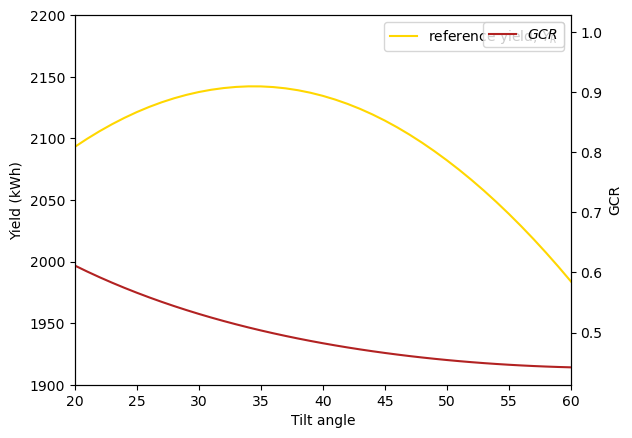

In [17]:
Y_R.plot(label="reference yield, $Y_R$", color='gold')
plt.ylabel('Yield (kWh)')
plt.xlabel('Tilt angle')
plt.ylim([1900,2200])
plt.legend()
plt.twinx()
GCR.plot(label="$GCR$", color='firebrick')
plt.legend()
plt.ylabel('GCR')
plt.xlim([20,60])
#plt.ylim([0.1,0.35])